# US Health Insurance
- Andrea Cohen
- 03.09.2023

## Data:
Source - 
- https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset

Content -
- This dataset contains 1338 rows of insured data, where the Insurance charges are given against the following attributes of the insured: Age, Sex, BMI, Number of Children, Smoker and Region. There are no missing or undefined values in the dataset.

## Preliminary Steps

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# read in the data
df = pd.read_csv('Data/insurance - insurance.csv')
display(df.head())
display(df.info())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


None

## Q1. Do smokers have higher insurance charges than non-smokers?

In [3]:
# split data into 2 groups
smoker_df = df.loc[df['smoker'] == 'yes'].copy()
display(smoker_df.head())
display(smoker_df.info())
no_smoker_df = df.loc[df['smoker'] == 'no'].copy()
display(no_smoker_df.head())
display(no_smoker_df.info())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768


<class 'pandas.core.frame.DataFrame'>
Int64Index: 274 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       274 non-null    int64  
 1   sex       274 non-null    object 
 2   bmi       274 non-null    float64
 3   children  274 non-null    int64  
 4   smoker    274 non-null    object 
 5   region    274 non-null    object 
 6   charges   274 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 17.1+ KB


None

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064 entries, 1 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1064 non-null   int64  
 1   sex       1064 non-null   object 
 2   bmi       1064 non-null   float64
 3   children  1064 non-null   int64  
 4   smoker    1064 non-null   object 
 5   region    1064 non-null   object 
 6   charges   1064 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 66.5+ KB


None

In [4]:
# define the feature of interest
smoker_charges = smoker_df['charges']
no_smoker_charges = no_smoker_df['charges']

### State your Null Hypothesis and Alternative Hypothesis

- Null Hypothesis: There is no significant difference between the charges of smokers vs non-smokers.

- Alternate Hypothesis: There is a significant difference between the charges of smokers vs non-smokers.

- Significance Level (Alpha): Alpha value is 0.05.

### Select the correct test according to the data type and number of samples

In [5]:
df['charges'].dtype

dtype('float64')

In [6]:
display(smoker_df.info())
display(no_smoker_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       274 non-null    int64  
 1   sex       274 non-null    object 
 2   bmi       274 non-null    float64
 3   children  274 non-null    int64  
 4   smoker    274 non-null    object 
 5   region    274 non-null    object 
 6   charges   274 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 17.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064 entries, 1 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1064 non-null   int64  
 1   sex       1064 non-null   object 
 2   bmi       1064 non-null   float64
 3   children  1064 non-null   int64  
 4   smoker    1064 non-null   object 
 5   region    1064 non-null   object 
 6   charges   1064 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 66.5+ KB


None

- Because the target data are numeric and there are 2 groups, the test will be an Independent (2-Sample) T-Test.

### Test the assumptions of your selected test.

#### Test for outliers

In [7]:
# check for outliers
zscores1= stats.zscore(smoker_charges)
outliers1 = abs(zscores1) > 3
np.sum(outliers1)

0

In [8]:
# check for outliers
zscores2= stats.zscore(no_smoker_charges)
outliers2 = abs(zscores2) > 3
np.sum(outliers2)

24

In [9]:
# remove outliers
no_smoker_charges = no_smoker_charges[(np.abs(stats.zscore(no_smoker_charges)) < 3)]

#### Test for normality

In [10]:
# check for normality
result_smoker_charges = stats.normaltest(smoker_charges)
result_smoker_charges

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [11]:
smoker_charges.count()

274

- The p-value is < 0.05, so there is a statistical difference between the distribution and a normal distribution.
- However, the group size is > 15, so the normality assumption can be safely ignored.


In [12]:
# check for normality
result_no_smoker_charges = stats.normaltest(no_smoker_charges)
result_no_smoker_charges

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)

In [13]:
no_smoker_charges.count()

1040

- The p-value is < 0.05, so there is a statistical difference between the distribution and a normal distribution.
- However, the group size is > 15, so the normality assumption can be safely ignored.

#### Test for equal variance

In [14]:
# check for equal variance
result1 = stats.levene(smoker_charges, no_smoker_charges)
result1

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

- The p-value is < 0.05, so there is a statistical difference between the variances of the 2 samples.
- Include "equal_var = False" for the t-test.

### Execute the selected test

In [15]:
# Independent t-test
result2 = stats.ttest_ind(smoker_charges, no_smoker_charges, equal_var = False)
result2

Ttest_indResult(statistic=33.732305987092516, pvalue=2.5753226625873578e-104)

### Interpret your p-value and reject or fail to reject your null hypothesis 

- The p-value is < 0.05, so reject the null hypothesis. There is a significant difference between groups.
- Smokers have different insurance charges than non-smokers.

### Show a supporting visualization that helps display the result

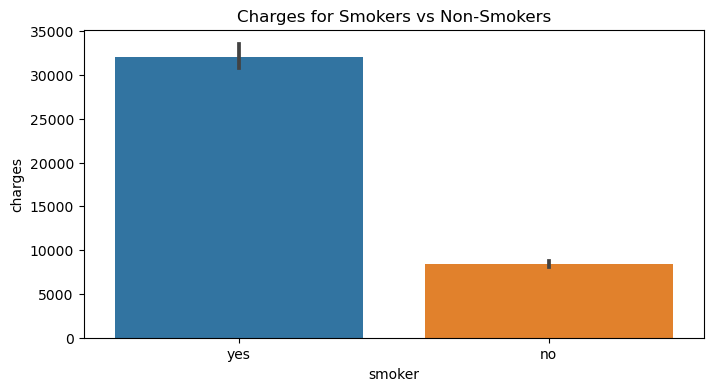

In [16]:
fig, ax = plt.subplots(figsize= (8, 4))
sns.barplot(data = df, x = 'smoker', y = 'charges')
plt.title('Charges for Smokers vs Non-Smokers');

## Q2. Are men more likely to smoke than women?

### State your Null Hypothesis and Alternative Hypothesis



- Null Hypothesis: There is no significant relationship between gender and if someone smokes.
- Alternate Hypothesis: A person's gender influences if they smoke.
- Significance Level (Alpha): Alpha value is 0.05.

### Select the correct test according to the data type and number of samples


In [17]:
df['sex'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1338 entries, 0 to 1337
Series name: sex
Non-Null Count  Dtype 
--------------  ----- 
1338 non-null   object
dtypes: object(1)
memory usage: 10.6+ KB


In [18]:
df['smoker'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1338 entries, 0 to 1337
Series name: smoker
Non-Null Count  Dtype 
--------------  ----- 
1338 non-null   object
dtypes: object(1)
memory usage: 10.6+ KB


- Because the target data are categorical and there are 2 groups, the test will be a Chi-Square test.

### Test the assumptions of your selected test.


#### Test for categorical variables

In [19]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [20]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

#### Test for independent outcomes

- males and females are from different groups
- smokers and non-smokers are from different groups

### Execute the selected test


In [21]:
# calculate the contingency table with pd.cross-tab
table1 = pd.crosstab(df['sex'], df['smoker'])
table1

smoker,no,yes
sex,,
female,547,115
male,517,159


In [22]:
# run the Chi-Square test and save the output
result3 = stats.chi2_contingency(table1)
chi2, p, deg_free, expected_vals = result3

### Interpret your p-value and reject or fail to reject your null hypothesis


In [23]:
# p-value
print(p)
p < 0.05

0.006548143503580696


True

- The p-value is < 0.05, so reject the null hypothesis.
- There is a significant relationship between gender and if someone smokes.
- Males are more likely to smoke; females are more likely not to smoke.


### Show a supporting visualization that helps display the result

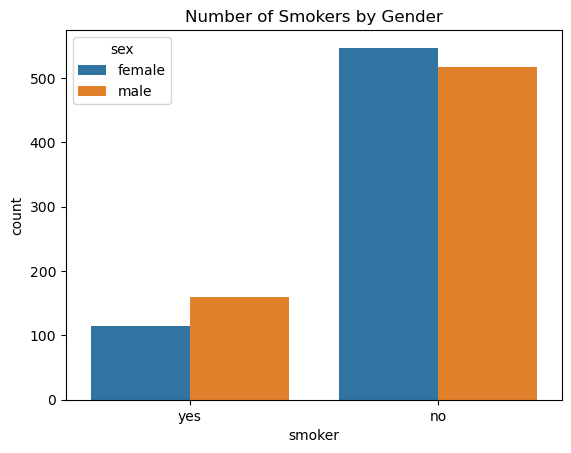

In [24]:
ax = sns.countplot(data = df, x = 'smoker', hue = 'sex')
ax.set_title("Number of Smokers by Gender");

## Q3. Do different regions have different charges, on average?

In [25]:
# separate the groups
groups = {}
for i in df['region'].unique():
    data = df.loc[df['region']==i,'charges'].copy()
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

### State your Null Hypothesis and Alternative Hypothesis


- Null Hypothesis:  all region's means for charges are the same (the charges are not significantly different among regions).
- Alternate Hypothesis: different regions have different mean charges (the charges are significantly different among regions).
- Significance Level (Alpha): Alpha value is 0.05.

### Select the correct test according to the data type and number of samples


In [26]:
display(df['region'].dtype)
display(df['charges'].dtype)

dtype('O')

dtype('float64')

In [27]:
display(df['region'].info())
display(df['charges'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 1338 entries, 0 to 1337
Series name: region
Non-Null Count  Dtype 
--------------  ----- 
1338 non-null   object
dtypes: object(1)
memory usage: 10.6+ KB


None

<class 'pandas.core.series.Series'>
RangeIndex: 1338 entries, 0 to 1337
Series name: charges
Non-Null Count  Dtype  
--------------  -----  
1338 non-null   float64
dtypes: float64(1)
memory usage: 10.6 KB


None

- Because the target data are numeric and there are 4 groups, the test will be an ANOVA and/or Tukey.

### Test the assumptions of your selected test.


#### Test for outliers


In [28]:
# check for outliers
for i, data in groups.items():
    zscores3 = stats.zscore(data)
    outliers3 = abs(zscores3) > 3
    print(np.sum(outliers3))
    # remove outliers
    no_smoker_charges = no_smoker_charges[(np.abs(stats.zscore(no_smoker_charges)) < 3)]

8
2
7
4


In [29]:
# remove outliers
for i, data in groups.items():
    data = data[(np.abs(stats.zscore(data)) < 3)]

#### Test for normality

In [30]:
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                       'p':p,
                       'test stat':stat}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [31]:
# check the significance with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


- The p-value is < 0.05 for all 4 groups, so there is a statistical difference between the distributions and a normal distribution.
- However, the group size (n) is > 15 for each of the groups, so the normality assumption can be safely ignored.

#### Test for equal variance

In [32]:
stats.levene(*groups.values())

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

- The p-value is < 0.05, so there is a statistical difference between the variances of the 2 samples.
- The non-parametric equivalent of the ANOVA is Kruskal-Wallis.

### Execute the selected test, or the alternative test (if you do not meet the assumptions)


In [33]:
result4 = stats.kruskal(*groups.values())
result4

KruskalResult(statistic=4.734181215658743, pvalue=0.19232908072121002)

### Interpret your p-value and reject or fail to reject your null hypothesis


- The p-value is > 0.05, so fail to reject the nullhypothesis.
- The charges are not significantly different among regions.

### Show a supporting visualization that helps display the result

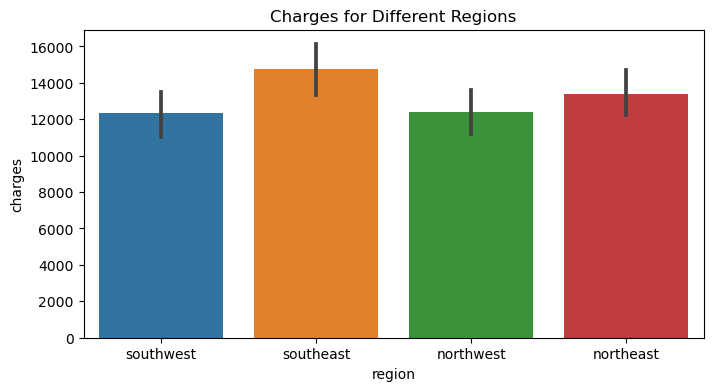

In [34]:
fig, ax = plt.subplots(figsize= (8, 4))
sns.barplot(data = df, x = 'region', y = 'charges')
plt.title('Charges for Different Regions');